## Samples

In [3]:
cd ..

/home/ec2-user/explain_where


/opt/pytorch/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import mean_with_confint
from collections import OrderedDict

metric = 'auc_relaxed'
value = 'roc_auc'
intersection = '0.09'

In [5]:
def barplot_with_ci(ax, data, dataset_name, metric, figsize=None, colormap='Spectral', legend=False):
    """ Make a bar plot for the input data. This should be a dictionary with one entry for each
    name in the legend (eg, each system). For each of those, the value should be another dictionary
    with one entry for each group being plotted (eg, each dataset). The entries within that inner
    dictionary should be a tuple of (mean, (ci_low, ci_high)).
    """
    for label, group in data.items():
        samples = list(group.keys())
        means = [group[s][0] for s in samples]
        ci_lows = [group[s][1][0] for s in samples]
        ci_highs = [group[s][1][1] for s in samples]

        yerr = [np.array(means) - np.array(ci_lows), np.array(ci_highs) - np.array(means)]

        # Colorear distinto cuando sample == 3000
        colors = ["red" if s == 3000 else "royalblue" for s in samples]

        bars = ax.bar([str(s) for s in samples], means, yerr=yerr, capsize=3, 
                      color=colors, label=label)

    ax.set_title(dataset_name)
    ax.set_ylabel(metric)
    if legend:
        ax.legend()
    # Rotar los xticks
    ax.set_xticklabels([str(s) for s in samples], rotation=90)


In [6]:
samples = [100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 6000, 8000, 10000, 12000, 14000]
methods = ['SHAP', 'LR', 'RF']
methods_dict = OrderedDict([('RF', 'RF'), ('LR','LR'), ('SHAP','SHAP')])
metric_dict = {'auc': 'Average AUC', 'auc_relaxed': 'Average AUC', 'leo_metric': 'LM'}

/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used

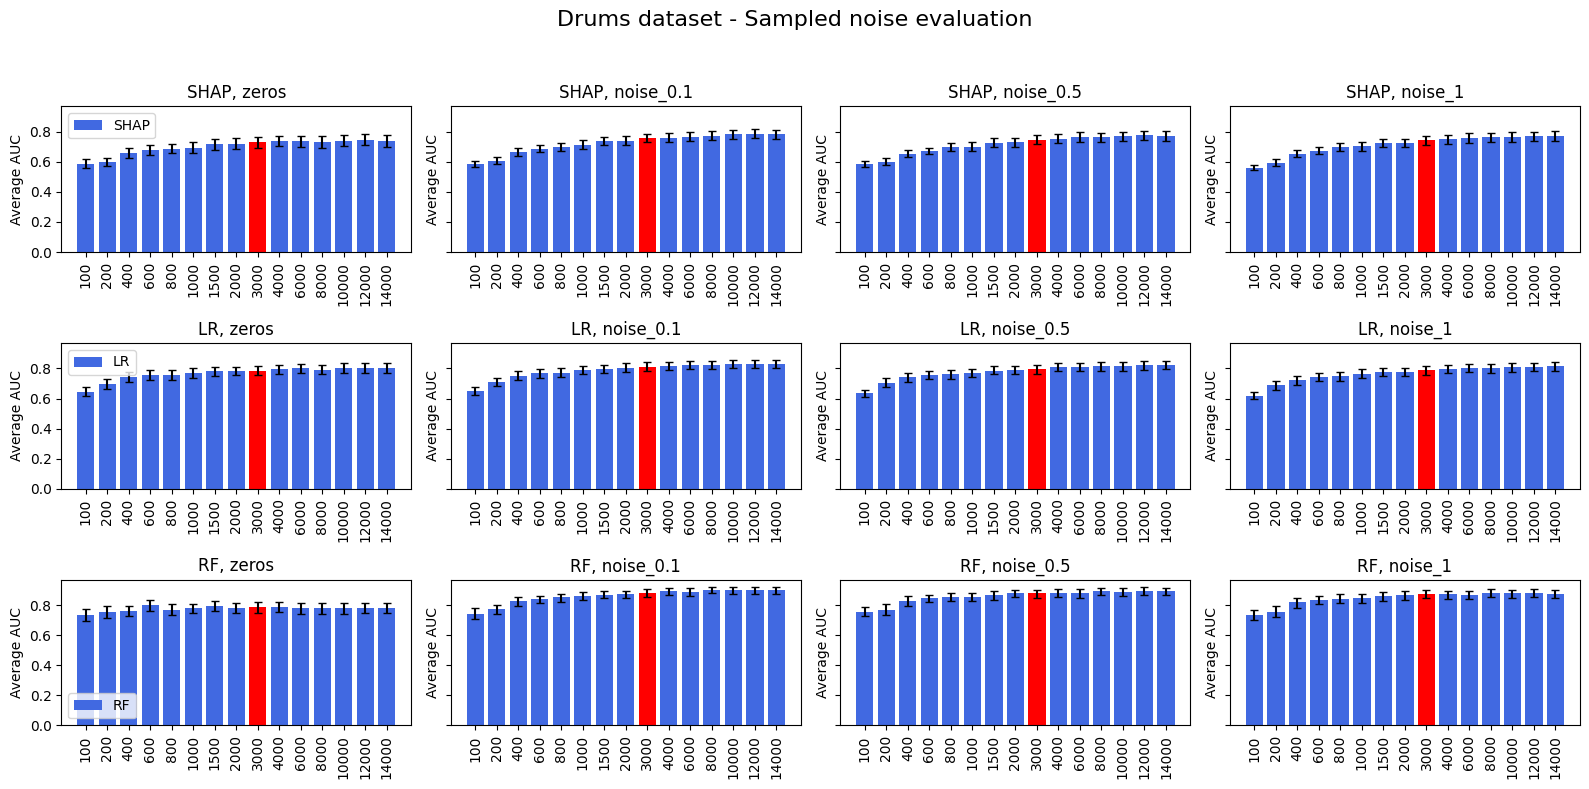

In [9]:
names = ["zeros",'noise_0.1', 'noise_0.5', 'noise_1']
fig, axs = plt.subplots(len(methods), len(names), figsize=(16, 8), sharey=True)

for methodi, method in enumerate(methods):
    for namei, name in enumerate(names):
        ax = axs[methodi][namei]
        base_path = f"/home/ec2-user/evaluations_sample_noise/drums"

        data2plot = OrderedDict()
        data2plot[methods_dict[method]] = OrderedDict()
        for sample in samples:
            file_path = f"{base_path}/auc_relaxed_{method}_{name}_samples{sample}_{intersection}.tsv"
            df_combination = pd.read_csv(file_path, sep="\t")
            values = df_combination["roc_auc"]
            perf = mean_with_confint(values)  # (mean, (ci_low, ci_high))
            data2plot[methods_dict[method]][sample] = perf

        barplot_with_ci(ax, data2plot, f"{method}, {name}", metric_dict.get(metric, metric), legend=(namei==0))
        
fig.suptitle("Drums dataset - Sampled noise evaluation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio arriba para el títuloplt.tight_layout()
plt.show()

/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used

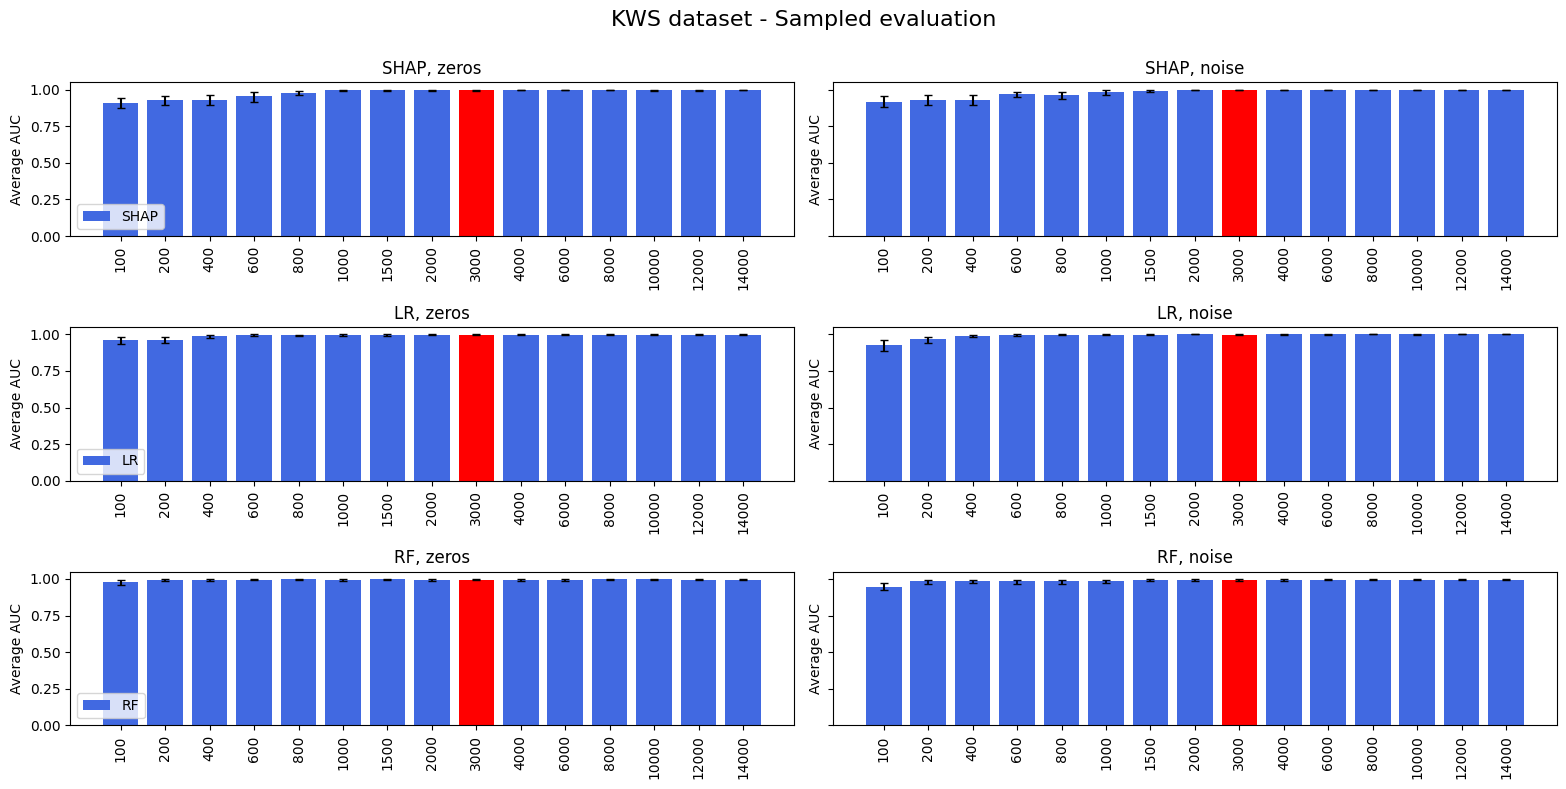

In [17]:
names = ["zeros",'noise']
fig, axs = plt.subplots(len(methods), len(names), figsize=(16, 8), sharey=True)

for methodi, method in enumerate(methods):
    for namei, name in enumerate(names):
        ax = axs[methodi][namei]
        base_path = f"/home/ec2-user/evaluations_sample_noise/kws"

        data2plot = OrderedDict()
        data2plot[methods_dict[method]] = OrderedDict()
        for sample in samples:
            file_path = f"{base_path}/auc_relaxed_{method}_{name}_samples{sample}_{intersection}.tsv"
            df_combination = pd.read_csv(file_path, sep="\t")
            values = df_combination["roc_auc"]
            perf = mean_with_confint(values)  # (mean, (ci_low, ci_high))
            data2plot[methods_dict[method]][sample] = perf

        barplot_with_ci(ax, data2plot, f"{method}, {name}", metric_dict.get(metric, metric), legend=(namei==0))

fig.suptitle("KWS dataset - Sampled evaluation", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.98]) 
plt.show()


/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used

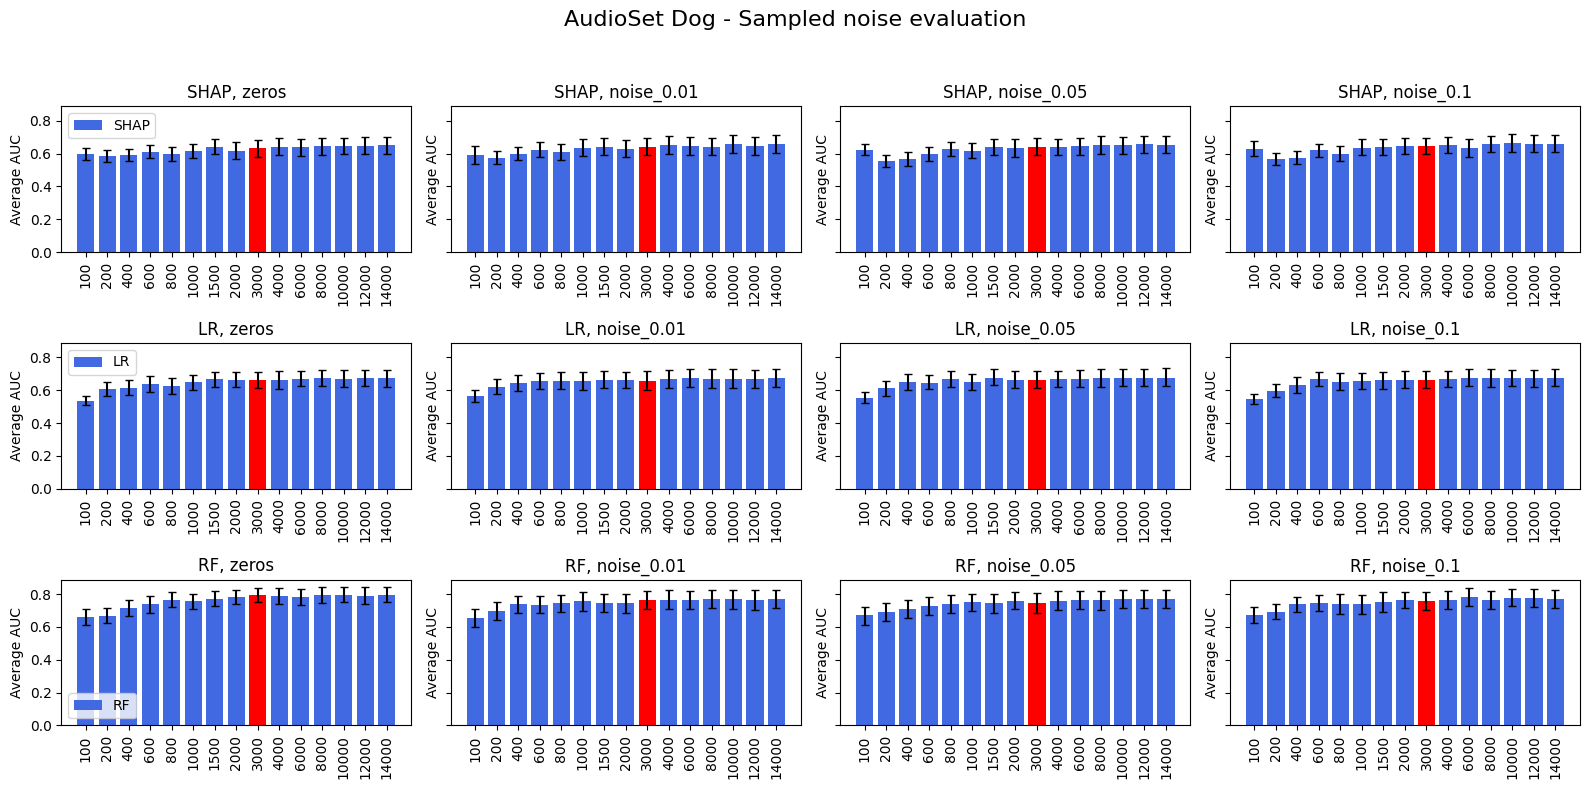

In [ ]:
names = ["zeros",'noise_0.01', 'noise_0.05', 'noise_0.1']
fig, axs = plt.subplots(len(methods), len(names), figsize=(16, 8), sharey=True)

for methodi, method in enumerate(methods):
    for namei, name in enumerate(names):
        ax = axs[methodi][namei]
        base_path = f"/home/ec2-user/evaluations_sample_noise/audioset_dog"

        data2plot = OrderedDict()
        data2plot[methods_dict[method]] = OrderedDict()
        for sample in samples:
            file_path = f"{base_path}/auc_relaxed_{method}_{name}_samples{sample}_{intersection}.tsv"
            df_combination = pd.read_csv(file_path, sep="\t")
            values = df_combination["roc_auc"]
            perf = mean_with_confint(values)  # (mean, (ci_low, ci_high))
            data2plot[methods_dict[method]][sample] = perf

        barplot_with_ci(ax, data2plot, f"{method}, {name}", metric_dict.get(metric, metric), legend=(namei==0))

fig.suptitle("AudioSet Dog - Sampled noise evaluation", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.98]) 
plt.show()

/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used

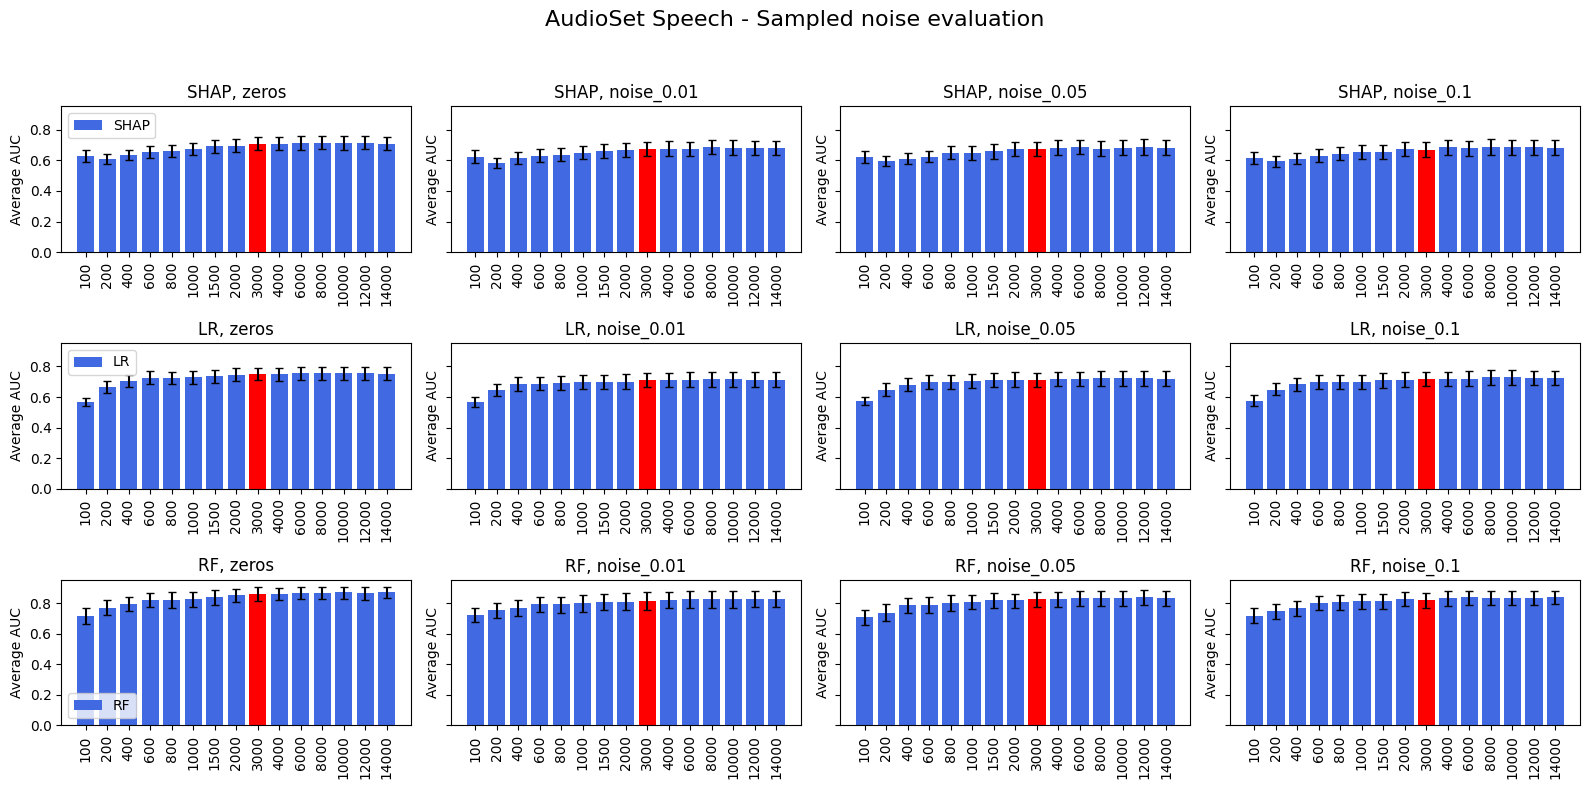

In [ ]:
names = ["zeros",'noise_0.01', 'noise_0.05', 'noise_0.1']
fig, axs = plt.subplots(len(methods), len(names), figsize=(16, 8), sharey=True)

for methodi, method in enumerate(methods):
    for namei, name in enumerate(names):
        ax = axs[methodi][namei]
        base_path = f"/home/ec2-user/evaluations_sample_noise/audioset_speech"

        data2plot = OrderedDict()
        data2plot[methods_dict[method]] = OrderedDict()
        for sample in samples:
            file_path = f"{base_path}/auc_relaxed_{method}_{name}_samples{sample}_{intersection}.tsv"
            df_combination = pd.read_csv(file_path, sep="\t")
            values = df_combination["roc_auc"]
            perf = mean_with_confint(values)  # (mean, (ci_low, ci_high))
            data2plot[methods_dict[method]][sample] = perf

        barplot_with_ci(ax, data2plot, f"{method}, {name}", metric_dict.get(metric, metric), legend=(namei==0))
fig.suptitle("AudioSet Speech - Sampled noise evaluation", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.98]) 
plt.show()

/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(s) for s in samples], rotation=90)
/tmp/ipykernel_343830/624259192.py:26: UserWarning: set_ticklabels() should only be used

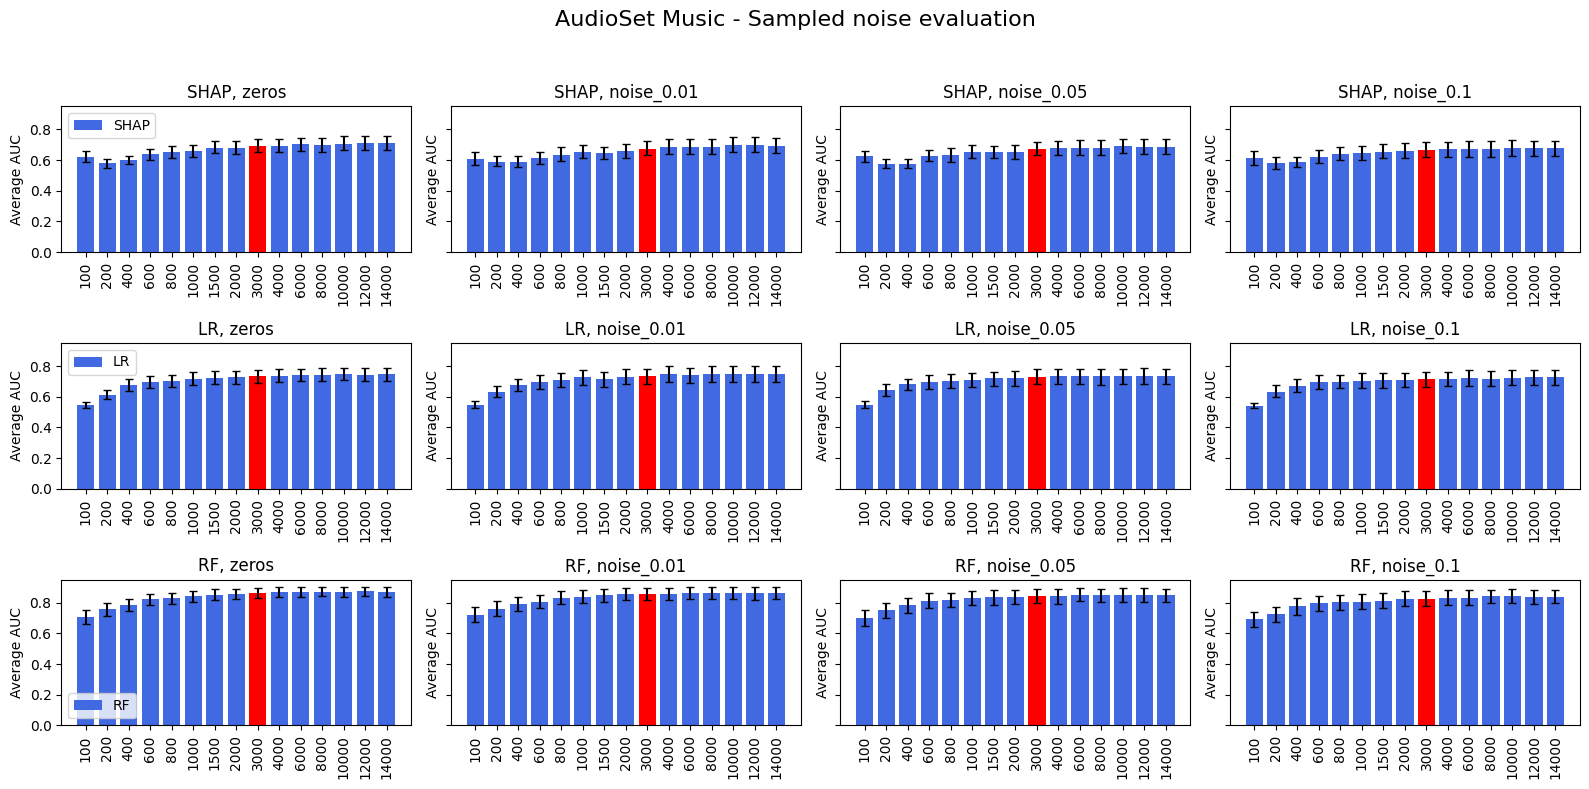

In [ ]:
names = ["zeros",'noise_0.01', 'noise_0.05', 'noise_0.1']
fig, axs = plt.subplots(len(methods), len(names), figsize=(16, 8), sharey=True)

for methodi, method in enumerate(methods):
    for namei, name in enumerate(names):
        ax = axs[methodi][namei]
        base_path = f"/home/ec2-user/evaluations_sample_noise/audioset_music"

        data2plot = OrderedDict()
        data2plot[methods_dict[method]] = OrderedDict()
        for sample in samples:
            file_path = f"{base_path}/auc_relaxed_{method}_{name}_samples{sample}_{intersection}.tsv"
            df_combination = pd.read_csv(file_path, sep="\t")
            values = df_combination["roc_auc"]
            perf = mean_with_confint(values)  # (mean, (ci_low, ci_high))
            data2plot[methods_dict[method]][sample] = perf

        barplot_with_ci(ax, data2plot, f"{method}, {name}", metric_dict.get(metric, metric), legend=(namei==0))
fig.suptitle("AudioSet Music - Sampled noise evaluation", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.98]) 
plt.show()